<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Computer-Vision/blob/main/SIGN_language_recognition_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers as tfl

### Loading the dataset

In [ ]:
import numpy as np
import h5py

def load_signs_dataset():
    train_dataset = h5py.File('/content/drive/MyDrive/Hand Sign/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/MyDrive/Hand Sign/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

In [ ]:
import matplotlib.pyplot as plt

y = 4


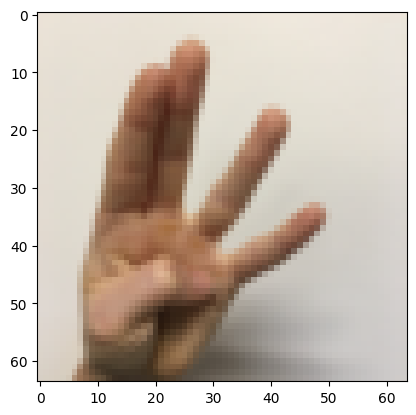

In [ ]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### Using Functional API instead of Sequential API

Sequential API allows us to create a list like network

Using Functional API, we can create deep learning model like a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.

It can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

In [ ]:
def convolutional_model(input_shape):
  input_img = keras.Input(shape = input_shape)
  ## convolution layer with 8 4*4 filters, stride of 1 and same padding
  Z1 = tfl.Conv2D( filters = 8, kernel_size = 4, strides = 1, padding = 'same')(input_img)      ## This is same as passing the input_img layer to convolution layer
  ## relu
  A1 = tfl.ReLU()(Z1)
  ## maxpool with 8 * 8 window, stride = 8 and same padding
  P1 = tfl.MaxPool2D(pool_size = 8, strides = 8, padding = 'same')(A1)
  ## convolution layer with 16 2 * 2 filters with stride = 1 and same padding
  Z2 = tfl.Conv2D(filters = 16, kernel_size = 2, strides = 1, padding = 'same')(P1)
  ## relu
  A2 = tfl.ReLU()(Z2)
  ## maxpool with 4 * 4 window , stride = 4, and same padding
  P2 = tfl.MaxPool2D(pool_size = 4, strides = 4, padding = 'same')(A2)
  ## flatten
  F = tfl.Flatten()(P2)
  ## dense layer with 6 neurons and activation as softmax for 0-5 hand gesture recognition
  outputs = tfl.Dense(6, activation = 'softmax')(F)

  model = tf.keras.Model(inputs = input_img, outputs = outputs)
  ## in sequential we did tf.keras.Sequential

  return model

In [ ]:
conv_model = convolutional_model((64, 64, 3))

conv_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_6 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_7 (ReLU)              (None, 8, 8, 16)          0         
                                                             

### Training the model

In [ ]:
# dataset = tf.data.Dataset.from_tensor_slices(range(1,10)).batch(2)
# for element in dataset:
#   print(element)

tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([3 4], shape=(2,), dtype=int32)
tf.Tensor([5 6], shape=(2,), dtype=int32)
tf.Tensor([7 8], shape=(2,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 4s 198ms/step - loss: 1.7978 - accuracy: 0.1713 - val_loss: 1.7841 - val_accuracy: 0.2083
Epoch 2/100
17/17 [==============================] - 2s 117ms/step - loss: 1.7805 - accuracy: 0.2278 - val_loss: 1.7779 - val_accuracy: 0.2833
Epoch 3/100
17/17 [==============================] - 2s 113ms/step - loss: 1.7738 - accuracy: 0.2583 - val_loss: 1.7732 - val_accuracy: 0.3083
Epoch 4/100
17/17 [==============================] - 2s 113ms/step - loss: 1.7681 - accuracy: 0.2787 - val_loss: 1.7681 - val_accuracy: 0.3333
Epoch 5/100
17/17 [==============================] - 2s 119ms/step - loss: 1.7610 - accuracy: 0.3213 - val_loss: 1.7616 - val_accuracy: 0.3417
Epoch 6/100
17/17 [==============================] - 3s 195ms/step - loss: 1.7530 - accuracy: 0.3426 - val_loss: 1.7548 - val_accuracy: 0.3500
Epoch 7/100
17/17 [==============================] - 2s 122ms/step - loss: 1.7431 - accuracy: 0.3620 - val_loss: 1.7467 - val_accuracy: 0.3250

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
plt.figure(figsize = (16, 9))

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

In [ ]:
import pandas as pd

df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)

<ipython-input-39-80200e80dd02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-39-80200e80dd02>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

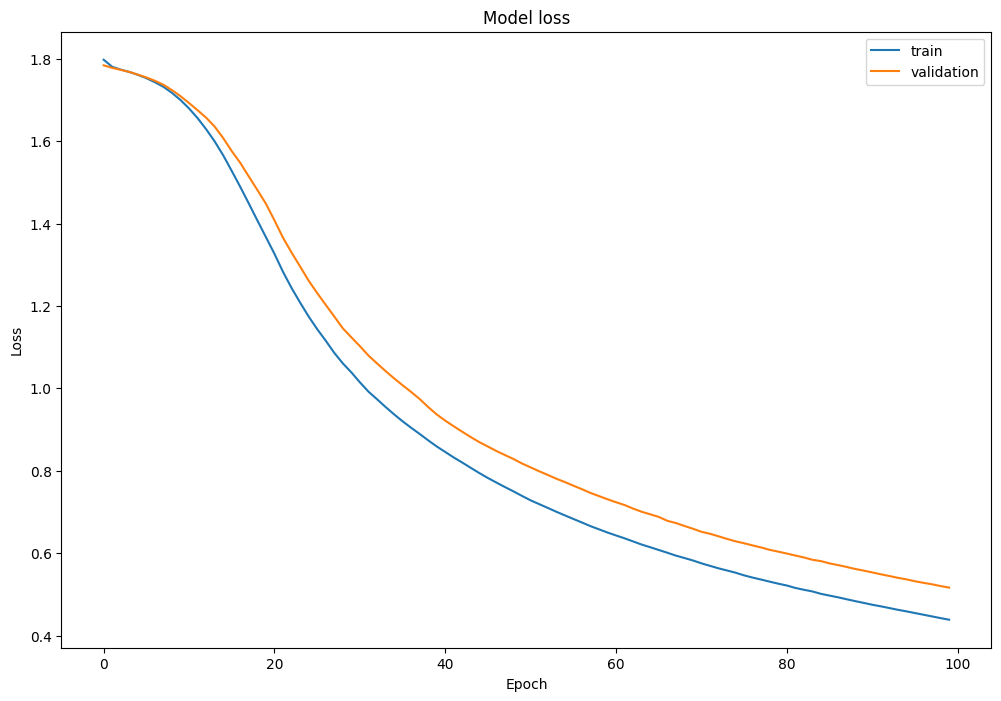

In [ ]:
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

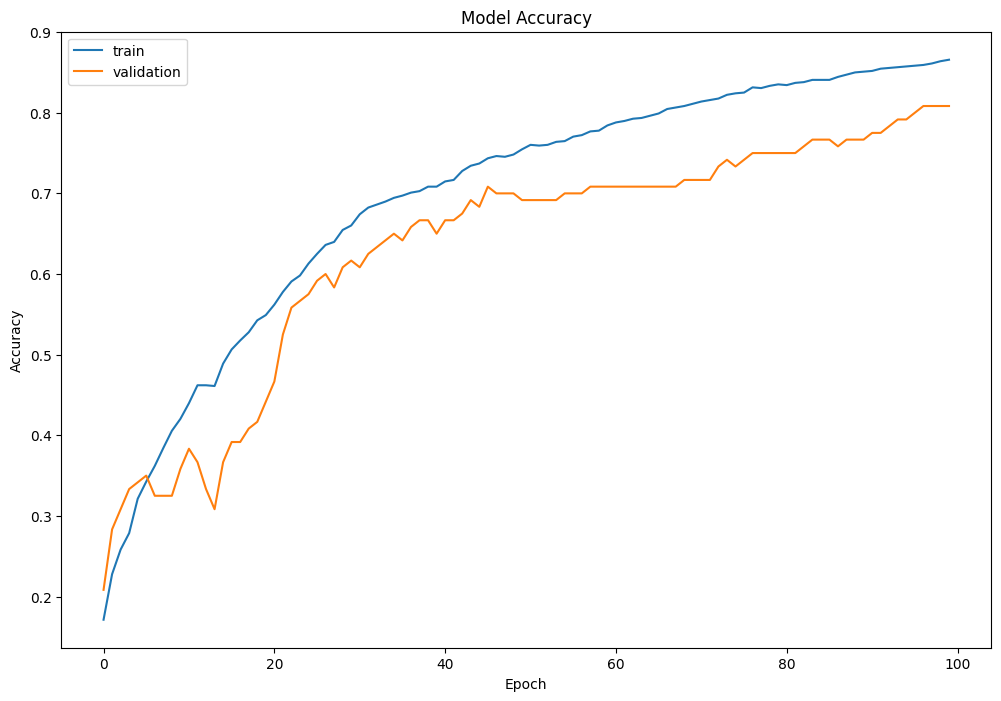

In [ ]:
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')